In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ab_test_results = pd.read_csv('ab_test.csv', parse_dates=['date'], index_col=0)
ab_test_results.head()    

,uid,date,purchase,sku,price,group,reg_date,device,gender,country,age
0,82082526.0,2018-02-15,0,NaN,NaN,V,2017-03-06,and,F,USA,30
1,82082526.0,2018-02-16,0,NaN,NaN,V,2017-03-06,and,F,USA,30
2,82082526.0,2018-02-17,0,NaN,NaN,V,2017-03-06,and,F,USA,30
3,82082526.0,2018-02-18,0,NaN,NaN,V,2017-03-06,and,F,USA,30
4,82082526.0,2018-02-19,0,NaN,NaN,V,2017-03-06,and,F,USA,30


In [3]:
# Compute and print the results
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 
print(results)

        uid
group      
C      2825
V      2834


In [4]:
# Find the unique users in each group 
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)


             uid
group           
C      49.920481
V      50.079519


In [5]:
# Find the unique users in each group 
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

                           uid
group device gender           
C     and    F       14.896625
             M       13.518289
      iOS    F       11.309419
             M       10.196148
V     and    F       14.861283
             M       13.659657
      iOS    F       10.920657
             M       10.637922


 p-value is the probability of observing a value as or more extreme than the one observed under the Null Hypothesis.


In [10]:
from scipy import stats
def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [11]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.17, con_size=1000, test_size=1000)
print(p_value)

4.131297741047306e-06


In [12]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=100, test_size=100)
print(p_value)

0.28366948940702086


In [13]:
p_value = get_pvalue(con_conv=0.48, test_conv=0.50, con_size=1000, test_size=1000)
print(p_value)

0.370901935824383


Great Work! To recap we observed that a large lift makes us confident in our observed result, while a small sample size makes us less so, and ultimately high variance can lead to a high p-value!

In [15]:
cont_conv, test_conv, cont_size, test_size = (0.09096495570387314, 0.1020053238686779, 5329, 5748)

In [16]:
# Compute the p-value
p_value = get_pvalue(cont_conv, test_conv, cont_size, test_size)
print(p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

0.04900185792087508
Significant Result


In [18]:
import scipy.stats as sci
def get_ci(value, cl, sd):
  loc = sci.norm.ppf(1 - cl/2)
  rng_val = sci.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 

  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

In [19]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.975, 0.5)
print(confidence_interval)

(0.9755040421682946, 1.0244959578317054)


In [20]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
print(confidence_interval)

(0.6690506448818785, 1.3309493551181215)


In [21]:
# Compute and print the confidence interval
confidence_interval = get_ci(1, 0.95, 0.001)
print(confidence_interval)

(1.0, 1.0)


In [22]:
# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - cont_conv) * cont_conv / cont_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

(-0.01729325163576479, 0.039373987965374314)


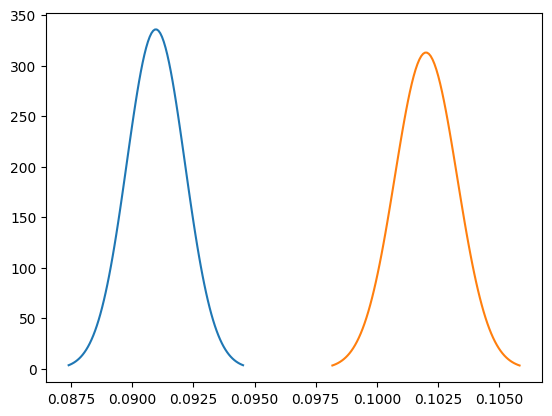

In [24]:
# Compute the standard deviations
from scipy.stats import norm
cont_var = 1.411507925080655e-06
test_var = 1.6255542142857143e-06
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace(cont_conv - 3 * control_sd, cont_conv + 3 * control_sd, 100)
test_line = np.linspace(test_conv - 3 * test_sd, test_conv + 3 * test_sd, 100)

# Plot the distribution     
plt.plot(control_line, norm.pdf(control_line, cont_conv, control_sd))
plt.plot(test_line, norm.pdf(test_line, test_conv, test_sd))
plt.show()

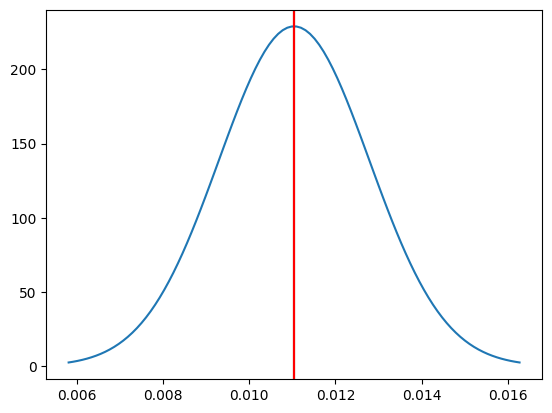

In [27]:
# Find the lift mean and standard deviation
lift_mean = test_conv - cont_conv
lift_sd = (test_var + cont_var) ** 0.5
lwr_ci = 0.01103999822042502
upr_ci = 0.011040000177957487
# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Plot the lift distribution
plt.plot(lift_line, norm.pdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()